In [87]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.optimizers import Adam

print(tf.__version__)
print(keras.__version__)

2.18.0
3.8.0


In [11]:
# download the dataset
fmnist = keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fmnist.load_data()

# print the data shape
print(x_train.shape)


(60000, 28, 28)


---
Label | Description
---
0 T-shirt/top

---
1 Trouser

---
2 	Pullover

---
3 	Dress

---
4 	Coat

---
5 	Sandal

---
6 	Shirt

---
7 	Sneaker

---
8 	Bag

---
9 	Ankle boot


Label:  7


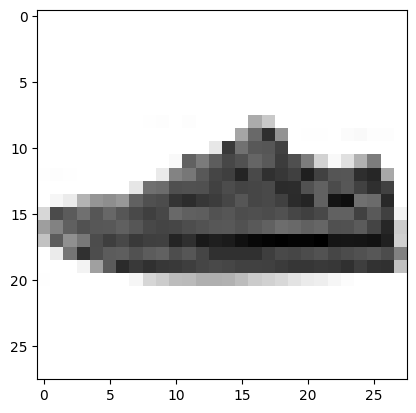

In [32]:
import matplotlib.pyplot as plt

print("Label: ", y_train[32132])
plt.imshow(x_train[32132], cmap=plt.cm.binary)
plt.show()

In [82]:
import numpy as np

num_classes = len(np.unique(y_train))
num_classes

10

In [99]:
# Create a Sequential model
model = tf.keras.models.Sequential()

# Flattens the 2D image input (28x28 pixels) into a 1D vector of size 784
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
# A 28×28 image → [[0.0, ..., 0.1], ..., [0.2, ..., 0.3]] → becomes → [0.0, ..., 0.3] (shape: (784,))

# Stack 5 fully connected (Dense) hidden layers, each has 128 neurons and uses the ReLU activation (ReLU = max(0, x))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2)) # 20% neurons dropped
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2)) # 20% neurons dropped
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(128, activation='relu'))

# The output layer has num_classes neurons (e.g., 10 for digits 0–9)
# The softmax activation turns the output into probabilities that sum to 1. The highest value indicates the predicted class
model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [100]:
optimizer = Adam(learning_rate=0.001)
# learning_rate → a hyperparameter that scales how much the model weights change with respect to the loss gradient.
# Too high → may cause unstable training.
# Too low → may train too slowly or get stuck.
# 0.001 Standard for Adam

model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [101]:
history = model.fit(x_train, y_train, epochs=30)

Epoch 1/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.6909 - loss: 0.8544
Epoch 2/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8006 - loss: 0.5566
Epoch 3/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8059 - loss: 0.5416
Epoch 4/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8377 - loss: 0.4596
Epoch 5/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8458 - loss: 0.4300
Epoch 6/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8507 - loss: 0.4118
Epoch 7/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8584 - loss: 0.3908
Epoch 8/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8630 - loss: 0.3781
Epoch 9/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8678 - loss: 0.3594
Epoch 10/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8732 - loss: 0.3520
Epoch 11/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8708 - loss: 0.3565
Epoch 12/30
1875/1875 ━

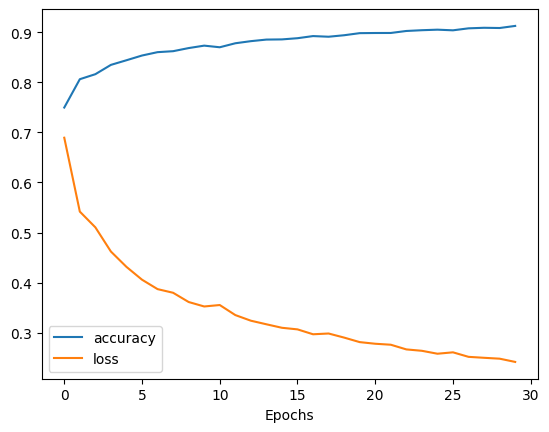

In [104]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.xlabel('Epochs')
plt.legend(['accuracy', 'loss'])
plt.show()

Label  0


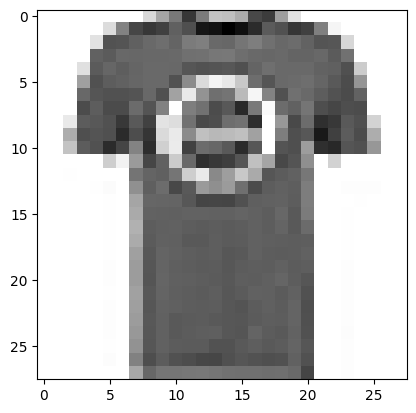


Label  3


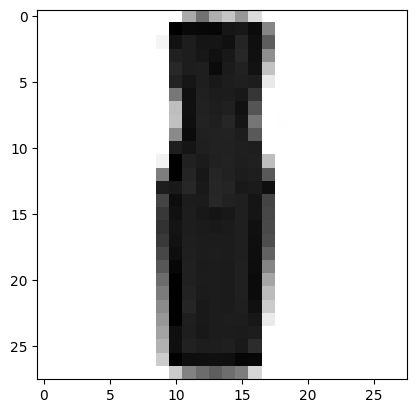


Label  8


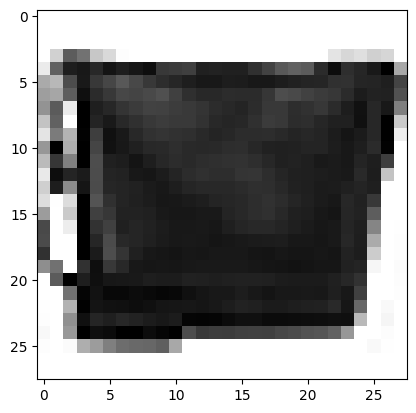


Label  7


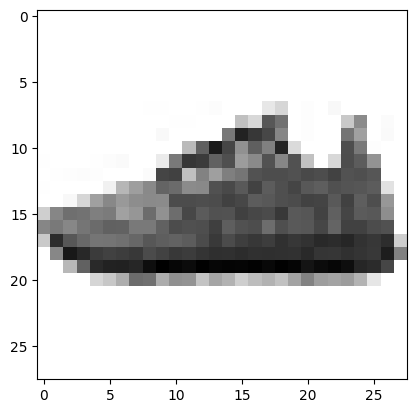


Label  6


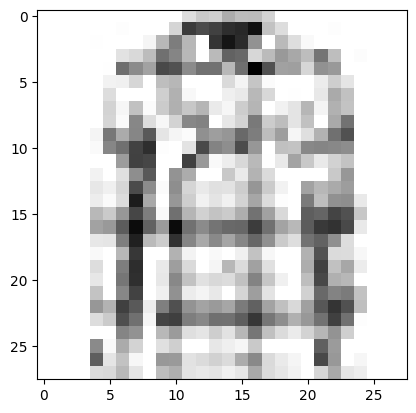

In [117]:
# conducting inference
samples = [48, 453, 3185, 5729, 34523]
to_pred = []
img_width = 28
img_height = 28

for sample in samples:
  reshape_img = x_train[sample].reshape(img_width, img_height)
  print("Label ", y_train[sample])
  plt.imshow(reshape_img, cmap=plt.cm.binary)
  plt.show()
  print("")
  to_pred.append(x_train[sample])

In [118]:
to_pred = np.array(to_pred)
print(to_pred.shape)

(5, 28, 28)


In [119]:
prediction = model.predict(to_pred)
prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


array([[9.99485016e-01, 5.73017580e-08, 2.90013713e-06, 2.38582544e-07,
        3.00378247e-08, 3.79512910e-09, 5.11549355e-04, 2.43405684e-10,
        9.49012104e-08, 7.05597747e-10],
       [1.12763862e-03, 6.27258385e-04, 9.33663032e-05, 9.96487260e-01,
        3.82427243e-04, 2.92516464e-08, 1.27636630e-03, 1.86194562e-08,
        5.40870815e-06, 1.19243936e-07],
       [4.98884390e-07, 3.83316756e-09, 4.43448861e-10, 6.99177313e-11,
        5.22170254e-08, 6.71913983e-11, 4.21992965e-08, 3.81591876e-11,
        9.99999404e-01, 1.80729243e-09],
       [1.95221950e-09, 3.84071308e-09, 9.99388683e-10, 2.62020317e-09,
        1.48163359e-09, 3.35221324e-04, 1.27990685e-08, 9.99496102e-01,
        2.11989391e-06, 1.66586411e-04],
       [1.25075097e-03, 7.42982911e-06, 3.39605451e-01, 6.49130496e-04,
        4.33834456e-02, 1.91774016e-05, 6.14989877e-01, 3.82169528e-05,
        2.60031320e-05, 3.05545291e-05]], dtype=float32)

In [120]:
classes = np.argmax(prediction, axis=1)
print(classes)

[0 3 8 7 6]
